## **Setup and libraries**

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [ ]:
!pip install ipython-autotime
%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 302 µs (started: 2024-08-21 15:54:16 +00:00)


In [ ]:
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import keras
import re
import os
from keras.models import load_model
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

time: 2.89 s (started: 2024-08-21 15:54:22 +00:00)


# **Preprocess data**

In [ ]:
# load the dataset
dataset_path= 'Churn_Modelling.csv'

df= pd.read_csv(dataset_path)

df .head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


time: 187 ms (started: 2024-08-21 15:54:31 +00:00)


In [ ]:
# cheak if there any null value or not
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


time: 23.8 ms (started: 2024-08-21 15:54:37 +00:00)


In [ ]:
# cheak the datatype
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


time: 6.97 ms (started: 2024-08-21 15:54:45 +00:00)


In [ ]:
# cheak if there any duplicate value or not
df.duplicated().sum()

0

time: 13.1 ms (started: 2024-08-21 15:54:50 +00:00)


,count
Exited,
0,7963
1,2037


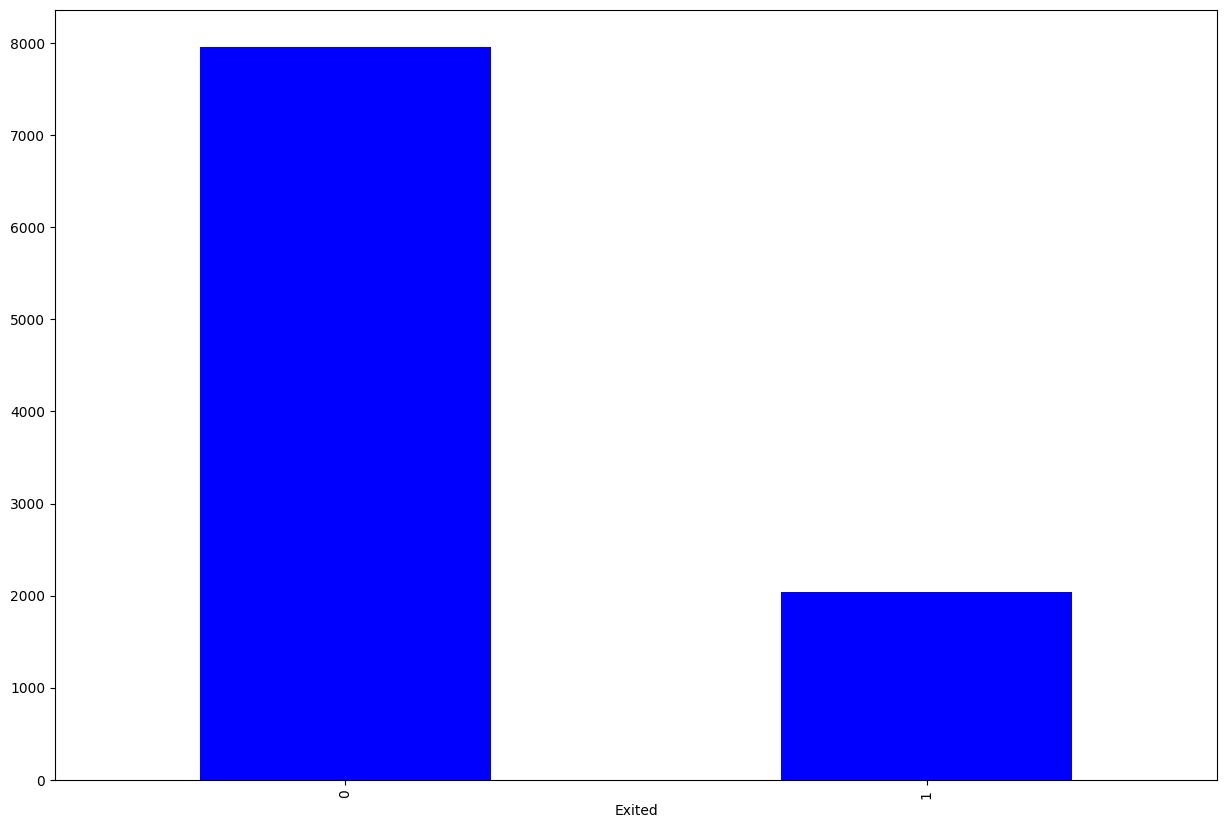

time: 795 ms (started: 2024-08-21 15:55:03 +00:00)


In [ ]:
# plot
count = df['Exited']
count.value_counts().plot(kind="bar",figsize=(15,10),color='blue')
count.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


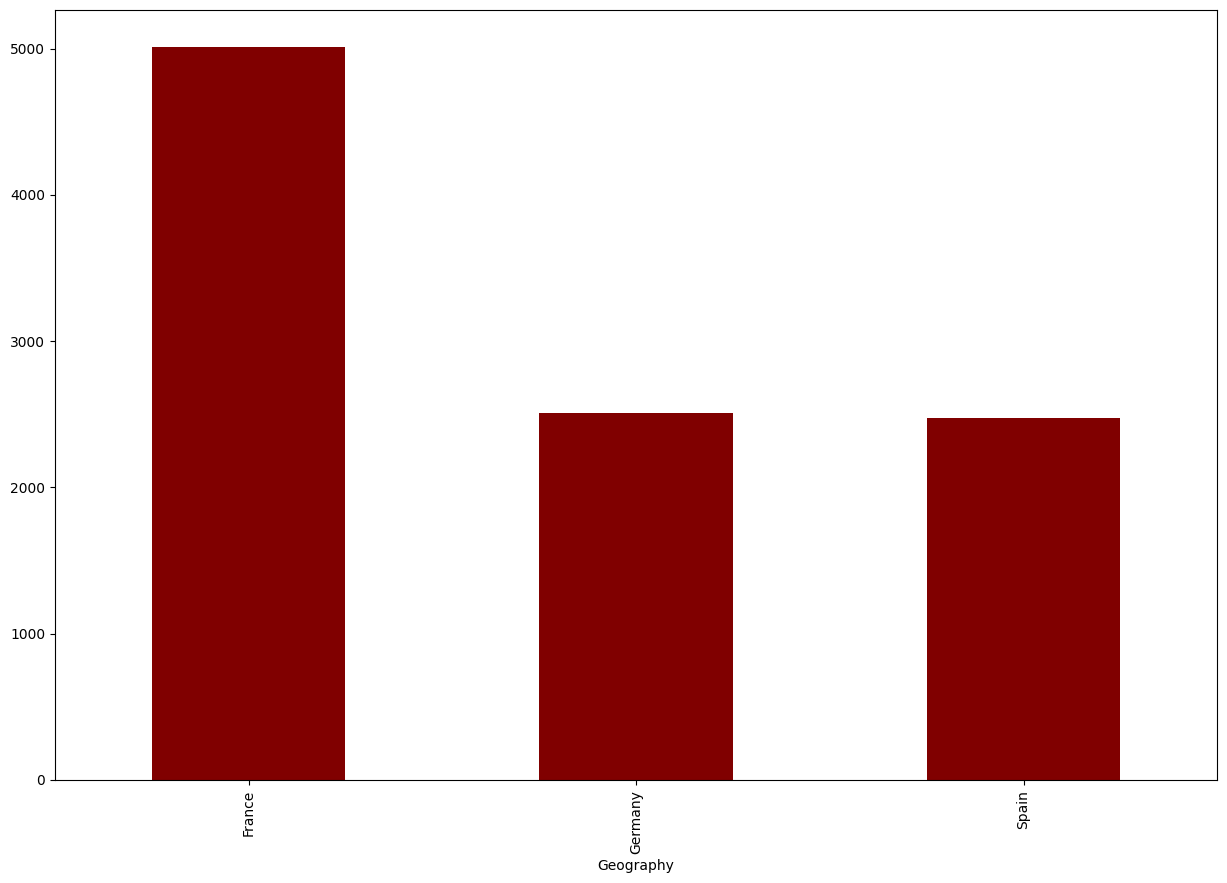

time: 711 ms (started: 2024-08-21 15:55:18 +00:00)


In [ ]:
df['Geography'].value_counts().plot(kind="bar",figsize=(15,10),color='maroon')
df['Geography'].value_counts()

,count
Gender,
Male,5457
Female,4543


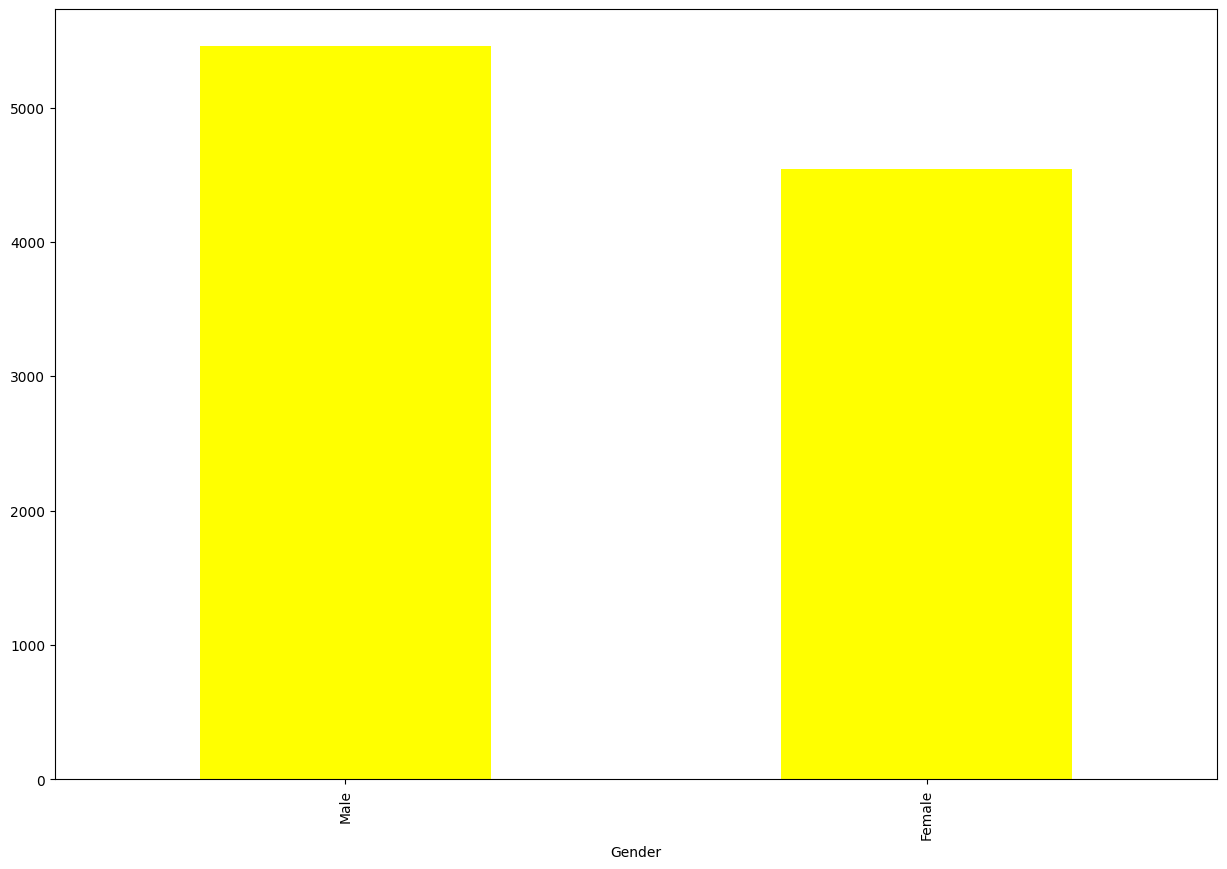

time: 227 ms (started: 2024-08-21 15:55:35 +00:00)


In [ ]:
df['Gender'].value_counts().plot(kind="bar",figsize=(15,10),color='yellow')
df['Gender'].value_counts()

,count
Age,
37,478
38,477
35,474
36,456
34,447
...,...
92,2
82,1
88,1


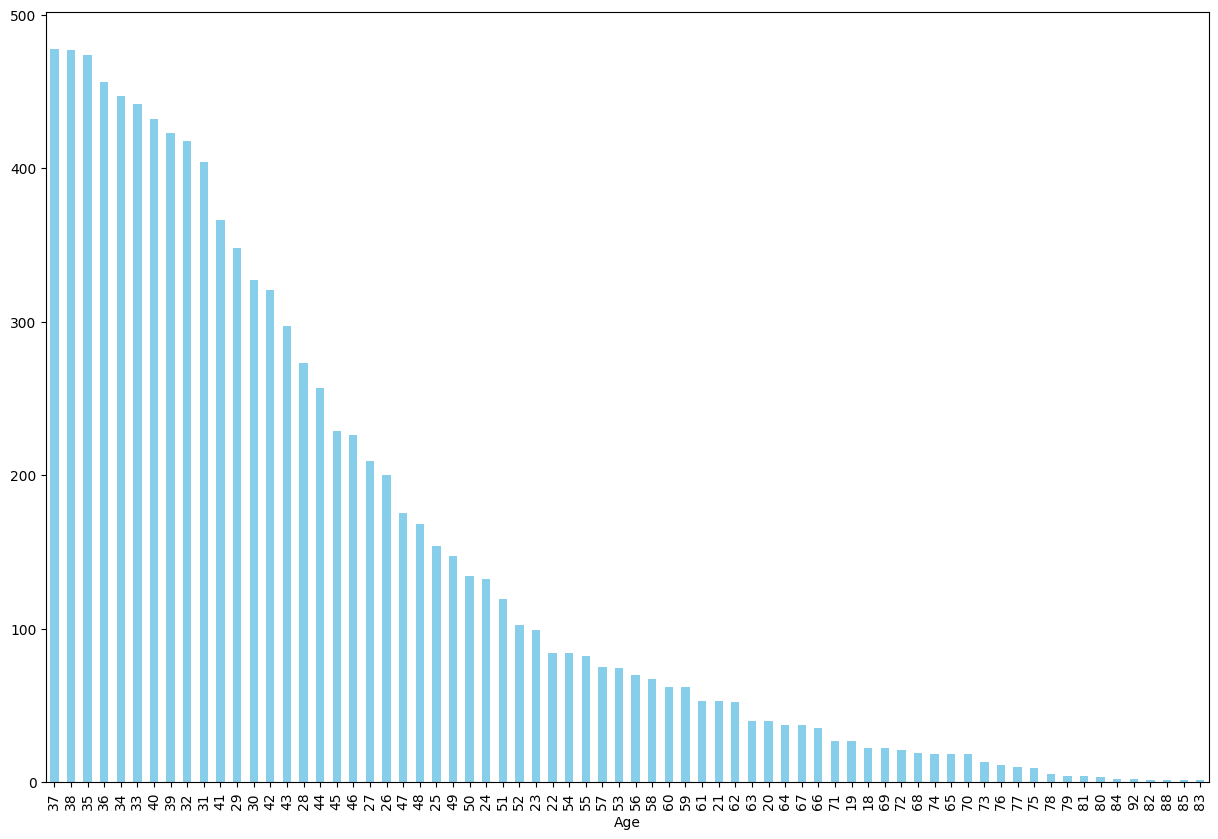

time: 1.1 s (started: 2024-08-21 15:55:45 +00:00)


In [ ]:
df['Age'].value_counts().plot(kind="bar",figsize=(15,10),color='skyblue')
df['Age'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


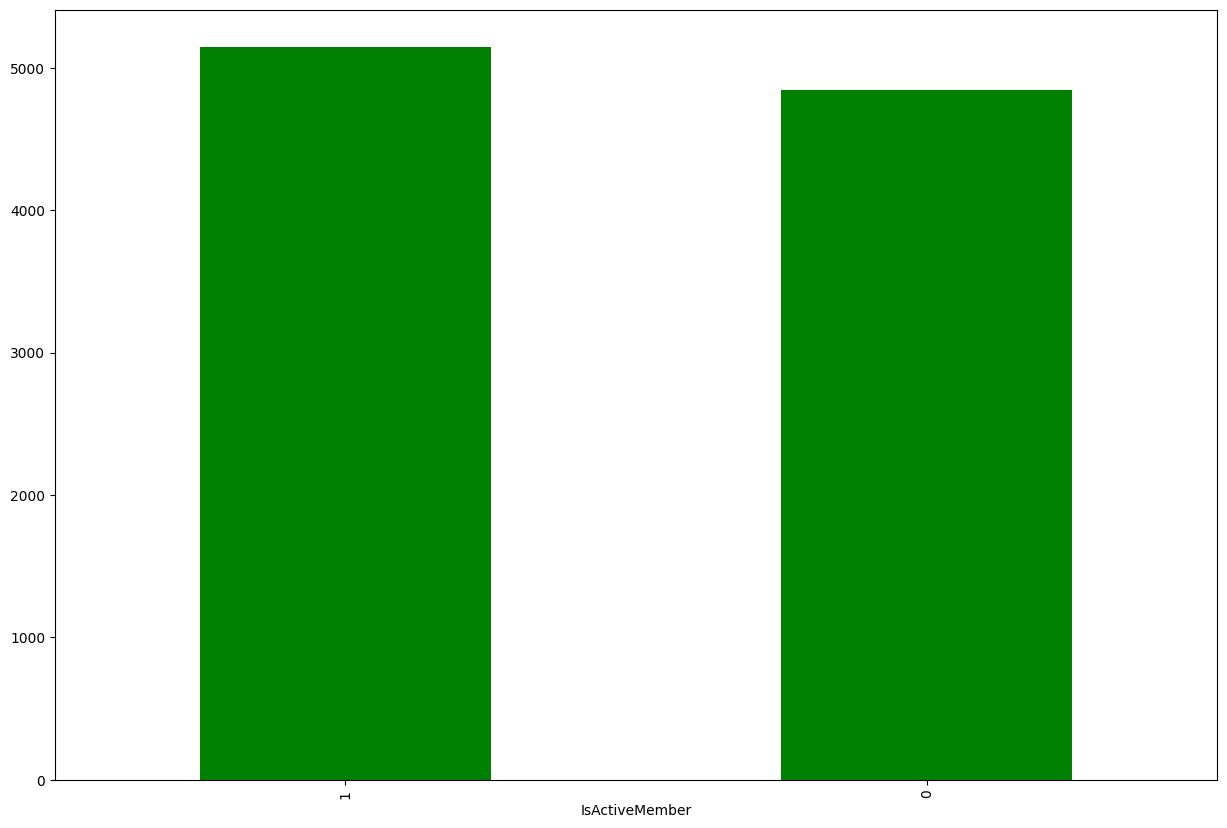

time: 382 ms (started: 2024-08-21 15:56:04 +00:00)


In [ ]:
df['IsActiveMember'].value_counts().plot(kind="bar",figsize=(15,10),color='green')
df['IsActiveMember'].value_counts()

In [ ]:
# drop unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace= True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


time: 42.7 ms (started: 2024-08-21 15:56:11 +00:00)


In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


time: 7.71 ms (started: 2024-08-21 15:56:18 +00:00)


In [ ]:
# convert all dtype in float
label_encoder = LabelEncoder()
columns_to_convert_in_string_to_int = ['Geography','Gender']
for col in columns_to_convert_in_string_to_int:
    df[col] = label_encoder.fit_transform(df[col])
columns_to_convert_in_int_to_float = ['CreditScore','Geography','Gender', 'Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
for col in columns_to_convert_in_int_to_float:
    df[col] = df[col].astype('float64')

time: 10.5 ms (started: 2024-08-21 15:56:23 +00:00)


In [ ]:
df.dtypes

,0
CreditScore,float64
Geography,float64
Gender,float64
Age,float64
Tenure,float64
Balance,float64
NumOfProducts,float64
HasCrCard,float64
IsActiveMember,float64
EstimatedSalary,float64


time: 6.26 ms (started: 2024-08-21 15:56:26 +00:00)


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


time: 65.2 ms (started: 2024-08-21 15:56:32 +00:00)


In [ ]:
X = df.drop(columns=['Exited'])
Y = df['Exited']

time: 2.59 ms (started: 2024-08-21 15:56:40 +00:00)


In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,0.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,0.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,0.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,1.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


time: 50.5 ms (started: 2024-08-21 15:56:42 +00:00)


In [ ]:
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


time: 7.56 ms (started: 2024-08-21 15:56:49 +00:00)


In [ ]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

time: 9.68 ms (started: 2024-08-21 15:56:58 +00:00)


In [ ]:
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

time: 4.58 ms (started: 2024-08-21 15:57:00 +00:00)


In [ ]:
X_train, X_test , Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

time: 7.21 ms (started: 2024-08-21 15:57:02 +00:00)


In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

time: 5.46 ms (started: 2024-08-21 15:57:08 +00:00)


# **Models**

**Tensorflow model (custom)**

In [ ]:
model = Sequential([
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


time: 8.98 ms (started: 2024-08-21 15:57:11 +00:00)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

time: 47.9 ms (started: 2024-08-21 15:57:17 +00:00)


In [ ]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5185 - loss: 0.7300 - val_accuracy: 0.7981 - val_loss: 0.4643
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8016 - loss: 0.4553 - val_accuracy: 0.8119 - val_loss: 0.4383
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8093 - loss: 0.4355 - val_accuracy: 0.8163 - val_loss: 0.4239
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8179 - loss: 0.4225 - val_accuracy: 0.8281 - val_loss: 0.4123
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8314 - loss: 0.4093 - val_accuracy: 0.8356 - val_loss: 0.4010
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.3937 - val_accuracy: 0.8425 - val_loss: 0.3881
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8416 - loss: 0.3872 - val_accuracy: 0.8481 - val_loss: 0.3784
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.3727 - val_accuracy: 0.

**Logistic Regression**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

time: 33.9 ms (started: 2024-08-21 15:57:33 +00:00)


**Gradient Boosting**

In [ ]:
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=42)

time: 1.42 s (started: 2024-08-21 15:57:35 +00:00)


**Random Forest**

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

time: 1.48 s (started: 2024-08-21 15:57:38 +00:00)


# **Models evaluation and predection**

**Tensorflow model**

In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\n Accuracy: {accuracy}')

# Predict
y_pred_tf = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8627 - loss: 0.3492

 Accuracy: 0.859000027179718
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
time: 643 ms (started: 2024-08-21 15:57:47 +00:00)


**Logistic Regression**

In [ ]:
# Predict
y_pred_log_reg = log_reg.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_log_reg)}")
print(classification_report(Y_test, y_pred_log_reg))

Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

time: 29 ms (started: 2024-08-21 15:57:50 +00:00)


**Gradient Boosting**

In [ ]:
# Predict
y_pred_gb = gb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_gb)}")
print(classification_report(Y_test, y_pred_gb))

Accuracy: 0.8655
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

time: 42 ms (started: 2024-08-21 15:57:58 +00:00)


**Random Forest**

In [ ]:
# Predict
y_pred_forest = random_forest.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred_forest)}")
print(classification_report(Y_test, y_pred_forest))

Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

time: 66.4 ms (started: 2024-08-21 15:57:59 +00:00)


# **Visualization(confusion matrix)**

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


time: 893 µs (started: 2024-08-21 15:58:07 +00:00)


**Tensorflow model**

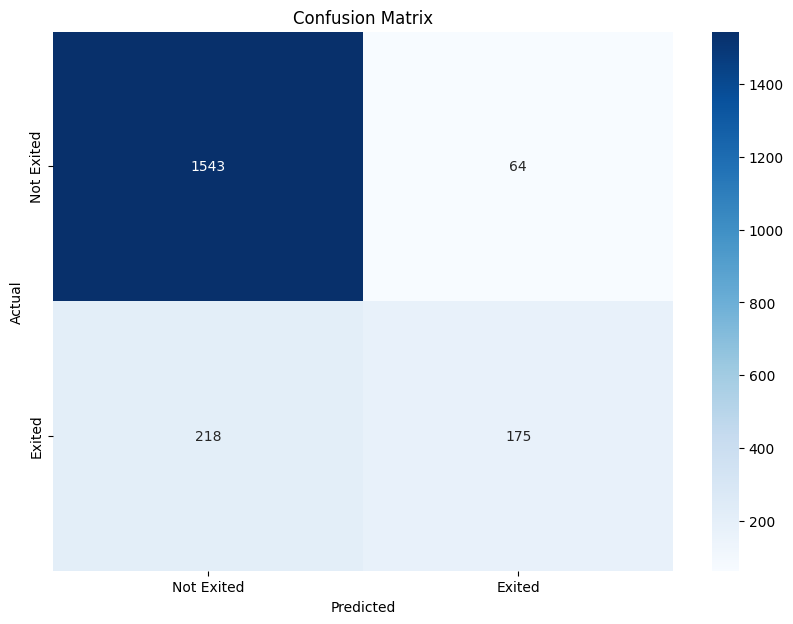

time: 416 ms (started: 2024-08-21 15:58:09 +00:00)


In [ ]:
plot_confusion_matrix(Y_test, y_pred_tf)

**Logistic Regression**

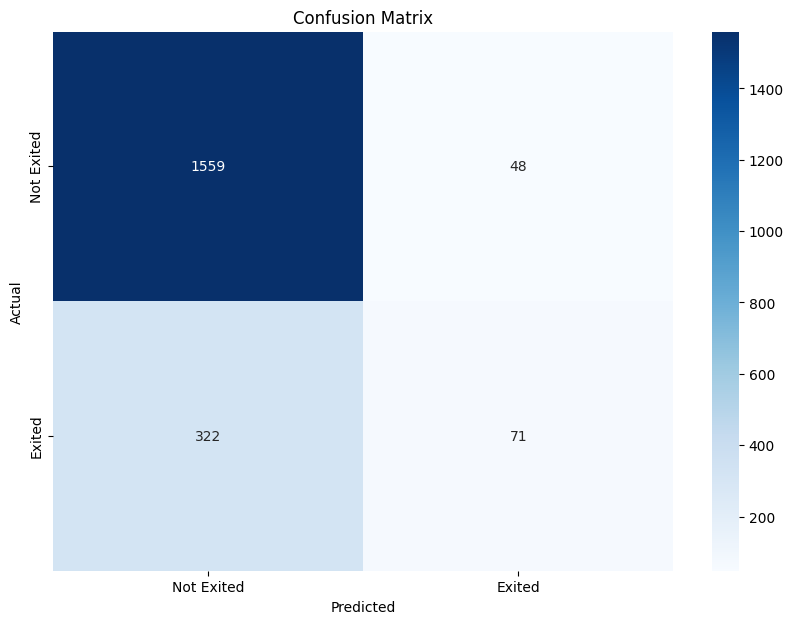

time: 257 ms (started: 2024-08-21 15:58:17 +00:00)


In [ ]:
plot_confusion_matrix(Y_test, y_pred_log_reg)

**Gradient Boosting**

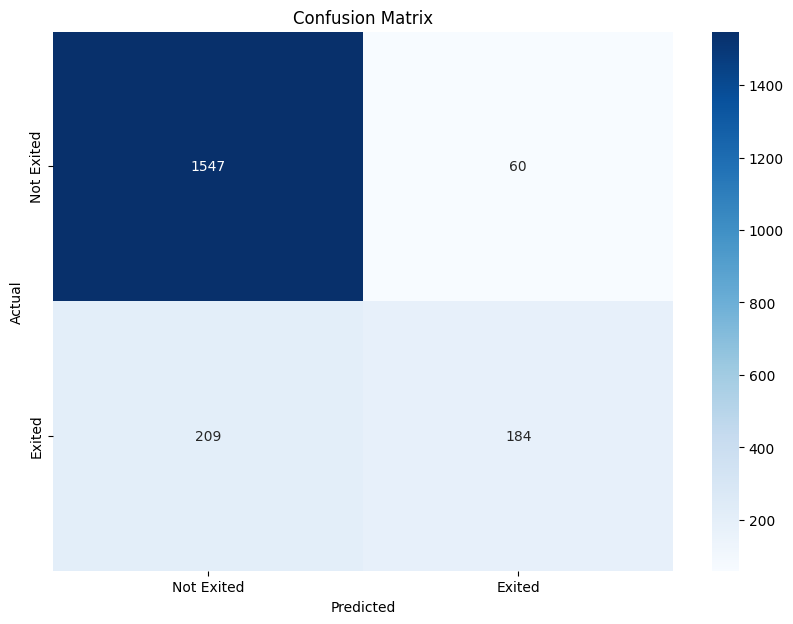

time: 254 ms (started: 2024-08-21 15:58:25 +00:00)


In [ ]:
plot_confusion_matrix(Y_test, y_pred_gb)

**Random Forest**

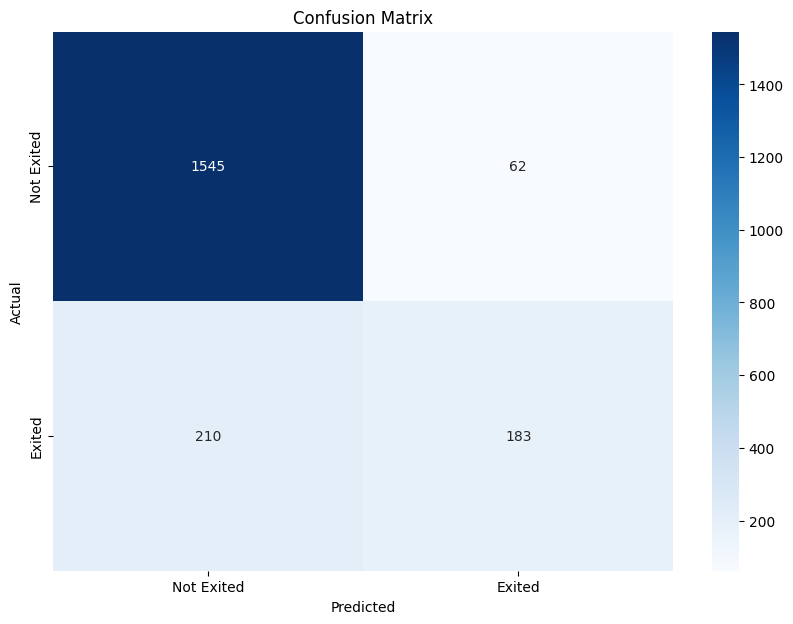

time: 406 ms (started: 2024-08-21 15:58:34 +00:00)


In [ ]:
plot_confusion_matrix(Y_test, y_pred_forest)